# Monte Carlo example

In [1]:
import os, sys
# Navigate to parent folder for import
os.chdir('../../..')
from pytwoway import sim_twfe_network
sn = sim_twfe_network.sim_twfe_network

# Weird code needed for output to show
os.chdir('docs-src/source/notebooks')
stdout = sys.stdout
sys.path.insert(1, os.path.join(sys.path[0], '..'))
sys.stdout = stdout

## First, optionally set parameter values for the simulated data

In [2]:
sim_params = {'num_ind': 10000, 'num_time': 5, 'firm_size': 50, 'nk': 10, 'nl': 5, 'alpha_sig': 1, 'psi_sig': 1, 'w_sig': 5, 'csort': 1, 'cnetw': 1, 'csig': 1, 'p_move': 0.5}

## Second, create a stwn object using the parameter choices

In [3]:
stw_net = sn(sim_params) # stw_net for simulated two-way network

## Third, optionally set parameter values for the Monte Carlo simulation

In [4]:
# For AKM estimation
akm_params = {'ncore': 1, 'batch': 1, 'ndraw_pii': 50, 'ndraw_tr': 5, 'check': False, 'hetero': False, 'out': 'res_akm.json', 'con': False, 'logfile': '', 'levfile': '', 'statsonly': False, 'Q': 'cov(alpha, psi)'}

# For CRE estimation
cre_params = {'ncore': 1, 'ndraw_tr': 5, 'ndp': 50, 'out': 'res_cre.json', 'posterior': False, 'wobtw': False}

# For clustering (specifically for the KMeans algorithm)
KMeans_params = {'n_clusters': 10, 'init': 'k-means++', 'n_init': 500, 'max_iter': 300, 'tol': 0.0001, 'precompute_distances': 'deprecated', 'verbose': 0, 'random_state': None, 'copy_x': True, 'n_jobs': 'deprecated', 'algorithm': 'auto'}

# For clustering
cluster_params = {'cdf_resolution': 10, 'grouping': 'quantile_all', 'year': None, 'user_KMeans': KMeans_params}

## Fourth, run the Monte Carlo simulation using the parameter choices

In [5]:
stw_net.twfe_monte_carlo(N=50, ncore=4, akm_params=akm_params, cre_params=cre_params, cluster_params=cluster_params)

## Fifth and finally, plot parameter estimates (plots show the difference from the truth)

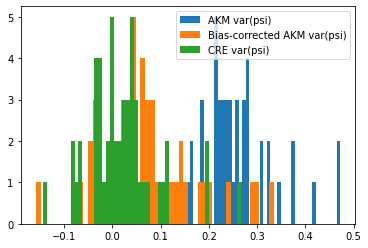

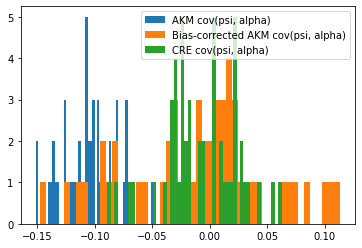

In [6]:
stw_net.plot_monte_carlo()